# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from wordcloud import WordCloud


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The customer services (call ...
1,✅ Trip Verified | I am a frequent flyer with...
2,Not Verified | Flew with BA to Punta Cana. To...
3,✅ Trip Verified | They downgraded me from bu...
4,✅ Trip Verified | The already delayed aircra...


In [4]:

df.to_csv("C:\\Users\\USER\\Reshma Reghunath\\Reshma\\BA_reviews.csv", encoding='utf-8')



Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
data= pd.read_csv('./BA_reviews.csv')
data

,Unnamed: 0,reviews
0,0,✅ Trip Verified | The customer services (call ...
1,1,✅ Trip Verified | I am a frequent flyer with...
2,2,Not Verified | Flew with BA to Punta Cana. To...
3,3,✅ Trip Verified | They downgraded me from bu...
4,4,✅ Trip Verified | The already delayed aircra...
...,...,...
995,995,✅ Trip Verified | Los Angeles to London Heath...
996,996,✅ Trip Verified | Our flight from Seattle to ...
997,997,✅ Trip Verified | Gatwick to Barbados. We fle...
998,998,✅ Trip Verified | Moscow to London. Fantastic...


In [6]:
data['reviews'] = data['reviews'].str.replace('✅', '')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
data.isnull().mean()*100

Unnamed: 0    0.0
reviews       0.0
dtype: float64

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(1000, 2)

In [11]:
data.drop(columns="Unnamed: 0",inplace=True)

In [12]:
data

,reviews
0,Trip Verified | The customer services (call c...
1,Trip Verified | I am a frequent flyer with ...
2,Not Verified | Flew with BA to Punta Cana. To...
3,Trip Verified | They downgraded me from bus...
4,Trip Verified | The already delayed aircraf...
...,...
995,Trip Verified | Los Angeles to London Heathr...
996,Trip Verified | Our flight from Seattle to L...
997,Trip Verified | Gatwick to Barbados. We flew...
998,Trip Verified | Moscow to London. Fantastic ...


In [17]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
data['Reviews'] = data['reviews'].apply(clean)
data.head()

,reviews,Cleaned Reviews,sentiment,compound_sentiment,Reviews
0,Trip Verified | The customer services (call c...,Trip Verified The customer services call cent...,"{'neg': 0.08, 'neu': 0.866, 'pos': 0.054, 'com...",-0.7932,Trip Verified The customer services call cent...
1,Trip Verified | I am a frequent flyer with ...,Trip Verified I am a frequent flyer with BA a...,"{'neg': 0.05, 'neu': 0.785, 'pos': 0.165, 'com...",0.9882,Trip Verified I am a frequent flyer with BA a...
2,Not Verified | Flew with BA to Punta Cana. To...,Not Verified Flew with BA to Punta Cana Took t...,"{'neg': 0.058, 'neu': 0.923, 'pos': 0.019, 'co...",-0.6127,Not Verified Flew with BA to Punta Cana Took t...
3,Trip Verified | They downgraded me from bus...,Trip Verified They downgraded me from busines...,"{'neg': 0.149, 'neu': 0.77, 'pos': 0.082, 'com...",-0.9273,Trip Verified They downgraded me from busines...
4,Trip Verified | The already delayed aircraf...,Trip Verified The already delayed aircraft la...,"{'neg': 0.106, 'neu': 0.846, 'pos': 0.048, 'co...",-0.8614,Trip Verified The already delayed aircraft la...


In [18]:
data

,reviews,Cleaned Reviews,sentiment,compound_sentiment,Reviews
0,Trip Verified | The customer services (call c...,Trip Verified The customer services call cent...,"{'neg': 0.08, 'neu': 0.866, 'pos': 0.054, 'com...",-0.7932,Trip Verified The customer services call cent...
1,Trip Verified | I am a frequent flyer with ...,Trip Verified I am a frequent flyer with BA a...,"{'neg': 0.05, 'neu': 0.785, 'pos': 0.165, 'com...",0.9882,Trip Verified I am a frequent flyer with BA a...
2,Not Verified | Flew with BA to Punta Cana. To...,Not Verified Flew with BA to Punta Cana Took t...,"{'neg': 0.058, 'neu': 0.923, 'pos': 0.019, 'co...",-0.6127,Not Verified Flew with BA to Punta Cana Took t...
3,Trip Verified | They downgraded me from bus...,Trip Verified They downgraded me from busines...,"{'neg': 0.149, 'neu': 0.77, 'pos': 0.082, 'com...",-0.9273,Trip Verified They downgraded me from busines...
4,Trip Verified | The already delayed aircraf...,Trip Verified The already delayed aircraft la...,"{'neg': 0.106, 'neu': 0.846, 'pos': 0.048, 'co...",-0.8614,Trip Verified The already delayed aircraft la...
...,...,...,...,...,...
995,Trip Verified | Los Angeles to London Heathr...,Trip Verified Los Angeles to London Heathrow ...,"{'neg': 0.084, 'neu': 0.893, 'pos': 0.023, 'co...",-0.6801,Trip Verified Los Angeles to London Heathrow ...
996,Trip Verified | Our flight from Seattle to L...,Trip Verified Our flight from Seattle to Lond...,"{'neg': 0.057, 'neu': 0.916, 'pos': 0.027, 'co...",-0.7644,Trip Verified Our flight from Seattle to Lond...
997,Trip Verified | Gatwick to Barbados. We flew...,Trip Verified Gatwick to Barbados We flew out...,"{'neg': 0.052, 'neu': 0.789, 'pos': 0.159, 'co...",0.9951,Trip Verified Gatwick to Barbados We flew out...
998,Trip Verified | Moscow to London. Fantastic ...,Trip Verified Moscow to London Fantastic firs...,"{'neg': 0.011, 'neu': 0.738, 'pos': 0.251, 'co...",0.9903,Trip Verified Moscow to London Fantastic firs...


In [19]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


In [21]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

data['POS tagged'] = data['Cleaned Reviews'].apply(token_stop_pos)
data.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,sentiment,compound_sentiment,Reviews,POS tagged
0,Trip Verified | The customer services (call c...,Trip Verified The customer services call cent...,"{'neg': 0.08, 'neu': 0.866, 'pos': 0.054, 'com...",-0.7932,Trip Verified The customer services call cent...,"[(Trip, n), (Verified, v), (customer, n), (ser..."
1,Trip Verified | I am a frequent flyer with ...,Trip Verified I am a frequent flyer with BA a...,"{'neg': 0.05, 'neu': 0.785, 'pos': 0.165, 'com...",0.9882,Trip Verified I am a frequent flyer with BA a...,"[(Trip, n), (Verified, n), (frequent, a), (fly..."
2,Not Verified | Flew with BA to Punta Cana. To...,Not Verified Flew with BA to Punta Cana Took t...,"{'neg': 0.058, 'neu': 0.923, 'pos': 0.019, 'co...",-0.6127,Not Verified Flew with BA to Punta Cana Took t...,"[(Verified, n), (Flew, n), (BA, n), (Punta, n)..."
3,Trip Verified | They downgraded me from bus...,Trip Verified They downgraded me from busines...,"{'neg': 0.149, 'neu': 0.77, 'pos': 0.082, 'com...",-0.9273,Trip Verified They downgraded me from busines...,"[(Trip, n), (Verified, n), (downgraded, v), (b..."
4,Trip Verified | The already delayed aircraf...,Trip Verified The already delayed aircraft la...,"{'neg': 0.106, 'neu': 0.846, 'pos': 0.048, 'co...",-0.8614,Trip Verified The already delayed aircraft la...,"[(Trip, n), (Verified, v), (already, r), (dela..."


In [22]:

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,reviews,Cleaned Reviews,sentiment,compound_sentiment,Reviews,POS tagged,Lemma
0,Trip Verified | The customer services (call c...,Trip Verified The customer services call cent...,"{'neg': 0.08, 'neu': 0.866, 'pos': 0.054, 'com...",-0.7932,Trip Verified The customer services call cent...,"[(Trip, n), (Verified, v), (customer, n), (ser...",Trip Verified customer service call centre e...
1,Trip Verified | I am a frequent flyer with ...,Trip Verified I am a frequent flyer with BA a...,"{'neg': 0.05, 'neu': 0.785, 'pos': 0.165, 'com...",0.9882,Trip Verified I am a frequent flyer with BA a...,"[(Trip, n), (Verified, n), (frequent, a), (fly...",Trip Verified frequent flyer BA last year no...
2,Not Verified | Flew with BA to Punta Cana. To...,Not Verified Flew with BA to Punta Cana Took t...,"{'neg': 0.058, 'neu': 0.923, 'pos': 0.019, 'co...",-0.6127,Not Verified Flew with BA to Punta Cana Took t...,"[(Verified, n), (Flew, n), (BA, n), (Punta, n)...",Verified Flew BA Punta Cana Took trouble res...
3,Trip Verified | They downgraded me from bus...,Trip Verified They downgraded me from busines...,"{'neg': 0.149, 'neu': 0.77, 'pos': 0.082, 'com...",-0.9273,Trip Verified They downgraded me from busines...,"[(Trip, n), (Verified, n), (downgraded, v), (b...",Trip Verified downgrade business premium eco...
4,Trip Verified | The already delayed aircraf...,Trip Verified The already delayed aircraft la...,"{'neg': 0.106, 'neu': 0.846, 'pos': 0.048, 'co...",-0.8614,Trip Verified The already delayed aircraft la...,"[(Trip, n), (Verified, v), (already, r), (dela...",Trip Verified already delay aircraft land ap...


In [27]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = sid.polarity_scores(review)
    return vs['compound']

data['Sentiment'] = data['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
data['Analysis'] = data['Sentiment'].apply(vader_analysis)
data.head()


,reviews,Cleaned Reviews,sentiment,compound_sentiment,Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Trip Verified | The customer services (call c...,Trip Verified The customer services call cent...,"{'neg': 0.08, 'neu': 0.866, 'pos': 0.054, 'com...",-0.7932,Trip Verified The customer services call cent...,"[(Trip, n), (Verified, v), (customer, n), (ser...",Trip Verified customer service call centre e...,-0.6772,Negative
1,Trip Verified | I am a frequent flyer with ...,Trip Verified I am a frequent flyer with BA a...,"{'neg': 0.05, 'neu': 0.785, 'pos': 0.165, 'com...",0.9882,Trip Verified I am a frequent flyer with BA a...,"[(Trip, n), (Verified, n), (frequent, a), (fly...",Trip Verified frequent flyer BA last year no...,0.9932,Positive
2,Not Verified | Flew with BA to Punta Cana. To...,Not Verified Flew with BA to Punta Cana Took t...,"{'neg': 0.058, 'neu': 0.923, 'pos': 0.019, 'co...",-0.6127,Not Verified Flew with BA to Punta Cana Took t...,"[(Verified, n), (Flew, n), (BA, n), (Punta, n)...",Verified Flew BA Punta Cana Took trouble res...,0.4751,Neutral
3,Trip Verified | They downgraded me from bus...,Trip Verified They downgraded me from busines...,"{'neg': 0.149, 'neu': 0.77, 'pos': 0.082, 'com...",-0.9273,Trip Verified They downgraded me from busines...,"[(Trip, n), (Verified, n), (downgraded, v), (b...",Trip Verified downgrade business premium eco...,-0.9355,Negative
4,Trip Verified | The already delayed aircraf...,Trip Verified The already delayed aircraft la...,"{'neg': 0.106, 'neu': 0.846, 'pos': 0.048, 'co...",-0.8614,Trip Verified The already delayed aircraft la...,"[(Trip, n), (Verified, v), (already, r), (dela...",Trip Verified already delay aircraft land ap...,-0.9254,Negative


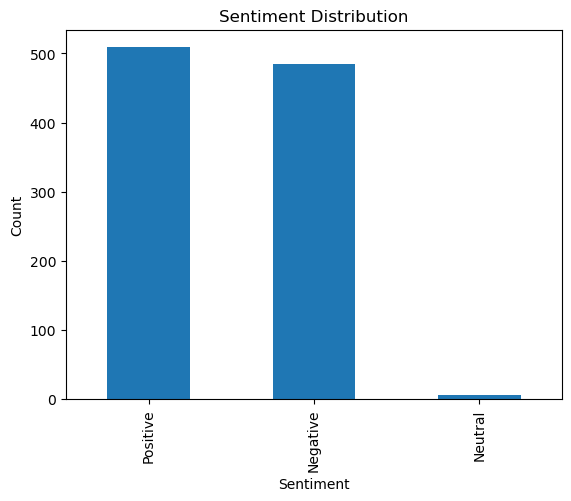

In [30]:
analyzer = SentimentIntensityAnalyzer()
data['Sentiment_Scores'] = data['Cleaned Reviews'].apply(lambda x: analyzer.polarity_scores(x))
data['Sentiment'] = data['Sentiment_Scores'].apply(lambda x: 'Positive' if x['compound'] > 0 else ('Negative' if x['compound'] < 0 else 'Neutral'))

# Visualization: Bar chart for sentiment distribution
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



In [32]:
vader_counts = data['Analysis'].value_counts()
vader_counts

Positive    481
Negative    414
Neutral     105
Name: Analysis, dtype: int64

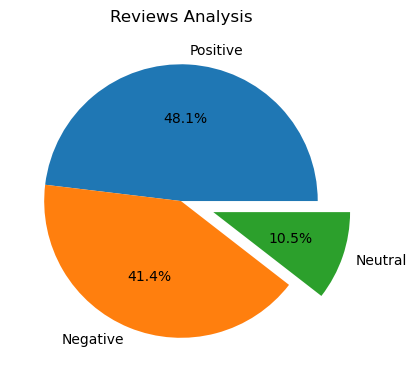

In [34]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

# Word Cloud

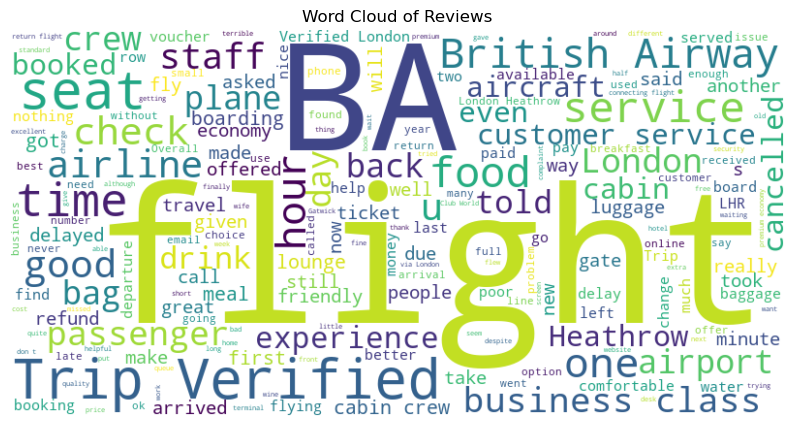

In [16]:
# Create a word cloud of the most common words in the reviews
all_reviews = ' '.join(data['reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()
